Using the KMeans() function, check the recognition of clusters in the iris set. Test all combinations of variables, i.e., (0,1); (0,2); (0,3); (1,2); ... ;(0,1,2); (0,1,3); ... ;(0,1,2,3) where number means the column number.

In [12]:
# importing libraries
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [13]:
# Iris dataset
iris= datasets.load_iris()
X=iris.data
y=iris.target
data = pd.DataFrame({'C0': X[:, 0], 'C1': X[:, 1],'C2': X[:, 2],'C3': X[:, 3]})
n=data.shape[0]

In [14]:
# all combinations for >2 columns
comb=[]
for L in range(2,len(data.columns) + 1):
    for subset in itertools.combinations(data.columns, L):
        comb.append(subset)

comb

[('C0', 'C1'),
 ('C0', 'C2'),
 ('C0', 'C3'),
 ('C1', 'C2'),
 ('C1', 'C3'),
 ('C2', 'C3'),
 ('C0', 'C1', 'C2'),
 ('C0', 'C1', 'C3'),
 ('C0', 'C2', 'C3'),
 ('C1', 'C2', 'C3'),
 ('C0', 'C1', 'C2', 'C3')]

In [15]:
# checking model for all subsets
accuracy=[]
for subset in comb:
    km = KMeans(n_clusters = 3, n_init=1).fit(data[list(subset)])
    labels=km.labels_
    
    acc = accuracy_score(y, labels)
    accuracy.append(acc)

<function matplotlib.pyplot.show(close=None, block=None)>

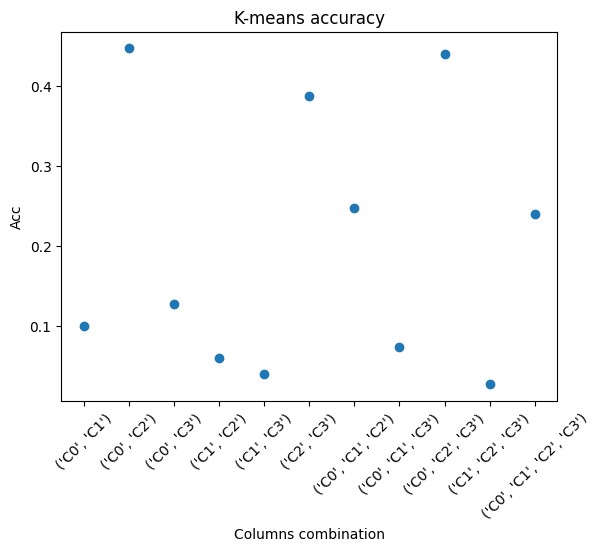

In [17]:
x=np.arange(0,11)
fig, ax = plt.subplots()

plt.scatter(x,accuracy)
plt.xticks(x)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = comb
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.title('K-means accuracy')
plt.ylabel('Acc')
plt.xlabel('Columns combination')

plt.show

# best duos are (0,2), (2,3), (0,2,3)